<font size='+1' color=red>**Attention:**</font> Data cleaning and other parts of preprocessing of data which we covered in the first assignment, is not neccesary all the time but you may need some of them according to task at hand. So we don't explicitly mention them each time. This is your job to figure out when to apply them.

## <font color='#D61E85' size='+3'>**Q1:**</font> <font size='+2'> **Multivariate least squares** </font>

In a regression task, suppose that instead of trying to predict a single output, we have a training set with multiple outputs for each example:

$$\{(x^{(i)}, y^{(i)}), i=1, ...,m\}, x^{(i)} ∈ \mathbb{R}^n, y^{(i)} ∈ \mathbb{R}^p. $$

Thus for each training example, $y^{(i)}$ is vector-valued, with $p$ entries. We wish to use a linear model to predict the outputs, as in least squares, by specifying the parameter matrix $𝚯$ in

$$y = 𝚯^T x,$$

where $𝚯 ∈ \mathbb{R}^{n×p}$.

<font size='+1'>**(a)**</font> The cost function for this case is

$$J(𝚯) = \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^p \Big((𝚯^Tx^{(i)})_j - y^{(i)}_j\Big)^2.$$

Write $J(𝚯)$ in matrix-vector notation (i.e., without using any summations). [Hint: Start with the $m × n$ design matrix

$$
X =
\begin{bmatrix}
\overline{\space\space\space\space\space\space} & (x^{(1)})^T & \overline{\space\space\space\space\space\space}\\
\overline{\space\space\space\space\space\space} & (x^{(2)})^T & \overline{\space\space\space\space\space\space}\\
&\vdots&\\
\overline{\space\space\space\space\space\space} & (x^{(m)})^T & \overline{\space\space\space\space\space\space}\\
\end{bmatrix}
$$

and the $m × p$ target matrix

$$
Y =
\begin{bmatrix}
\overline{\space\space\space\space\space\space} & (y^{(1)})^T & \overline{\space\space\space\space\space\space}\\
\overline{\space\space\space\space\space\space} & (y^{(2)})^T & \overline{\space\space\space\space\space\space}\\
&\vdots&\\
\overline{\space\space\space\space\space\space} & (y^{(m)})^T & \overline{\space\space\space\space\space\space}\\
\end{bmatrix}
$$

and then work out how to express $J(𝚯)$ in terms of these matrices.]

<font size='+1'>**(b)**</font> Find the closed form solution for $𝚯$ which minimizes $J(𝚯)$. This is the equivalent to the normal equations for the multivariate case.

<font size='+1'>**(c)**</font> Suppose instead of considering the multivariate vectors $y^{(i)}$ all at once, we instead compute each variable $y^{(i)}_j$ separately for each $j = 1,\dots,p$. In this case, we have a $p$ individual linear models, of the form

$$ y^{(i)}_j = θ^T_j x^{(i)}, j = 1, \dots , p. $$

(So here, each $θ_j ∈ \mathbb{R}^n$). How do the parameters from these $p$ independent least squares problems compare to the multivariate solution?

<font color='#8FCF26' size='+2'>**A1:**</font> Part (a), (b), and (c)

**(a):** When $X$ is a $m×n$ matrix, $Y$ is a $m×p$ matrix and $𝚯$ is a $n×p$ matrix, $J(𝚯)$ in matrix format will be:

$J(𝚯) = 1/2m (X𝚯 - Y)^2$

**(b):** To minimize $J(𝚯)$, we should take a derivative from it and see that when it will be 0. It is like simple linear regression problem so we will have:

$𝚯 = (X^TX)^{-1}X^TY$

**(c):**:In this case, $x^{(i)}$ is a $1×n$ matrix, $θ^T_j$ is a $1×n$ matrix and $y^{(i)}_j$ will be just a scaler. The shape of our weights is different from the scenario which we calculate all y values together.

As you can see the normal equations of multivariate case is simillar to the univariate case. Using this normal equation we can find the model parameters directly without the need of gradient descent.

<font size='+1'>**(d)**</font> At first, try to implement linear regression model using the normal equation obtained from the previous question. Secondly, consider [this](https://www.kaggle.com/datasets/kyasar/boston-housing) dataset. Split the data to 70-15-15 and try to fit your model on training set in order to predict the `crim` and `tax` columns. Then evaluate it using the test set. Report the loss and accuracy of each split of the data.

<font color='#8FCF26' size='+2'>**A1:**</font> Part (d) <br> Create some cell down below to write and run your code.

At first we load the Boston Housing dataset and take a look at its columns:

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

path = "/content/boston_housing.csv"
df = pd.read_csv(path)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


We extract target columns, "crim" and "tax", from our dataset and consider the remaining ones to predict these two columns. After that we split the dataset to train, validation and test sets:

In [122]:
Y = df[["crim","tax"]]
X = df.drop(["crim", "tax"], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Now it's time for training! Based on the normal equations that we wrote in previous section, we compute the weights for this problem:

In [123]:
X_mat = np.matrix(X_train)
X_mat_T =X_mat.T
inv_X = np.linalg.inv(np.matmul(X_mat_T, X_mat))
inv_X_T = np.matmul(inv_X, X_mat_T)
Y = np.matrix(y_train)
weights = np.matmul(inv_X_T, Y)

To evaluate our model, firstly we predict validation and test sets using the computed weights:

In [124]:
x_test = np.matrix(X_test)
x_val = np.matrix(X_val)
test_pred = np.matmul(x_test, weights)
val_pred = np.matmul(x_val, weights)

To compute the error and the cost we have in this problem, we use the given formula in the question. In fact, we are calculating MSE here for our target. To aim this, we use ***computeCost*** function:

In [125]:
def computeCost(y, y_pred):
    y_pred = np.sum(y_pred, axis=1)
    return np.sum(np.sqrt((y_pred - y)**2))/(2 * y.shape[0])

In [126]:
test_cost = computeCost(y_test, test_pred)
val_cost = computeCost(y_val, val_pred)

In [127]:
# Costs
print("** Validation Cost **")
print("- crim: ", val_cost['crim'])
print("- tax: ", val_cost['tax'])
print("/////////////////////////")
print("** Test Cost **")
print("- crim: ", test_cost['crim'])
print("- tax: ", test_cost['tax'])

** Validation Cost **
- crim:  195.55051182297154
- tax:  20.71400150300079
/////////////////////////
** Test Cost **
- crim:  218.20951877092745
- tax:  15.632398617291905


## <font color='#D61E85' size='+3'>**Q2:**</font> <font size='+2'> **$l^1$ and $l^2$-Regularization** </font>

When training a machine learning model, it's possible for the model to exhibit high accuracy on the training set while performing poorly on the test data.

This situation indicates a potential issue with *overfitting*. Overfitting occurs when the machine learning model attempts to fit the training data too closely, capturing not only the underlying patterns but also noise and inaccuracies present in the dataset. Consequently, the model becomes less effective and accurate when applied to new, unseen data.

To address overfitting, various methods can be employed. In the context of Linear Regression, one approach involves the utilization of regularization techniques, commonly known as $l^1$ and $l^2$-regularization methods.

<font size='+1'>**(a)**</font> First, write down the cost function for $l^1$ and $l^2$-regularization and with the help of the following image, try to explain their differences.

<font size='+1'>**(b)**</font> Imagine feature selection is crucial for your task, which regularization technique will you use? Explain the reason behind of your decision and try to justify your answer using the derivative of the cost functions which you wrote for the part (a).

![](https://miro.medium.com/v2/resize:fit:800/1*ZeINTX82W7vwqLMHHWEaTQ.jpeg)



<font color='#8FCF26' size='+2'>**A2:**</font> Parts (a) and (b)

**L1 Regularization (Lasso)**: The L1 regularization term is added to the standard logistic regression cost function, and it is the sum of the absolute values of the weights multiplied by a regularization parameter, denoted by $λ$:

$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} |\theta_j|
$


**L2 Regularization (Ridge):** The L2 regularization term is the sum of the squares of the weights multiplied by the regularization parameter:

$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$

**Differences:**


1.   **Effect on weights:** L1 tends to produce sparse weight vectors by driving some weights to exactly zero. It is useful for feature selection. L2 encourages small weights but rarely drives them to exactly zero. It helps prevent overfitting by penalizing large weights.
2.   **Robustness:** L1 is robust to outliers as it can eliminate the impact of certain features. L2 is less robust to outliers but generally provides smoother solutions.
3.  **Use cases:** L1 is used when there is a suspicion that many features are irrelevant or redundant.
L2 is used to prevent overfitting when there are many correlated features.

The right picture shows l2 regularization and the left picture shows l1. The countors we have show the MSE error according to different params. The smallest reachable MSE is the smallest ellipse tangent to the blue area. The sparsity of params in case of l1 is obvious according to image. L1 tends to set more values to zero and forwards them to edges. While because l2 shape is circle, there is less probablity to set any weight zero.

**(b):** At first we write the derivative of each cost function. For L1:

$\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} - h_{\theta}(x^{(i)}) \right] x_j^{(i)} + \frac{\lambda}{2m} \text{sign}(\theta_j)
$

And for L2 we have:

$\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} - h_{\theta}(x^{(i)}) \right] x_j^{(i)} + \frac{\lambda}{m} \theta_j
$

When our model is logistic regression and feature selection is crucial, using L1 regularization is more beneficial. L1 has a tendency to produce sparse weight vectors, effectively driving some weights to exactly zero. This property promotes automatic feature selection, as non-useful features are assigned zero weights. In contrast, L2 regularization shrinks all of the coefficients in the model towards zero, but does not remove any features entirely.

The key point in effectiveness of L1 is $\text{sign}(\theta_j)$ in its derivative. If each of weight parameters is near to zero, sign function will remove this weight and assign it the value of zero. This property helps model to remove unnecessary features.

<font size='+1'>**(c)**</font> In this part we are going to see the impact of each regularization technique and to get more familiar with concept of overfitting and underfitting.
First, generate the relevant data using the following codes.


In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.arange(-10,10,0.2)
Y = 2*np.cos(x)/-np.pi + (2*x)/(2*np.pi)+2*np.cos(3*x)/(-3*np.pi)

Now, add white Gaussian noise to the data with an impact factor of $0.1$. Try to fit a function of degree 1 to 15 to the data.

With given parameters (impact factor, mean and std), we intialized the white Gaussian noise and added it to our data. In the below plot, you can see both original and noisy data:

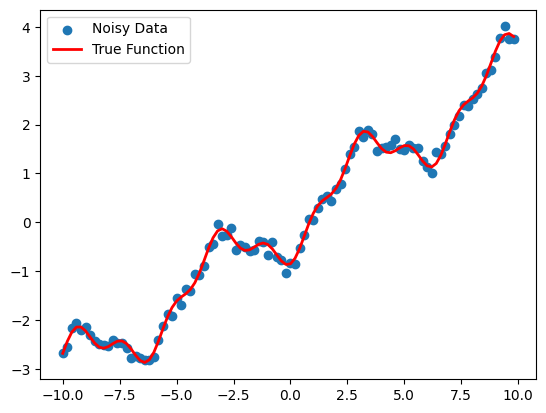

In [129]:
mean = 0
std = 1
# Your code:
""" Add white Gaussian noise to the data
    IF = 0.1
    mean = 0
    std = 1
    size = len(x)
"""
noise = 0.1 * np.random.normal(0, 1, len(x))
Y_noisy = Y + noise

# Plot the original and noisy data
plt.scatter(x, Y_noisy, label='Noisy Data')
plt.plot(x, Y, label='True Function', color='red', linewidth=2)
plt.legend()
plt.show()

Now we apply ploynomial feature to our data with given degrees and then train linear regression model. We save each model to analyze the performance of them in the next steps:

In [130]:
"""Fit polynomials from degree 1 to 15"""
degrees = np.arange(1, 16)

"""Save models """
models = []

for degree in degrees:
    model = Pipeline([('polyfeat', PolynomialFeatures(degree)), ('lin_reg', LinearRegression())])
    model.fit(x.reshape(-1, 1), Y_noisy)
    models.append(model)

- Determine the best and worst degree in terms of the total cost.

To find the best and worst degrees, firstly we predict the data using each model and then measure MSE for each of them. The model with smallest cost has the best degree and vice versa.

According to results, the best degree is 15 and the worst degree is 1. It seems that applying higher degrees on data will bring us better results:

In [131]:
# Your code:
from sklearn.metrics import mean_squared_error

best_degree = None
worst_degree = None
best_cost = float('inf')
worst_cost = 0
costs = []

for idx, model in enumerate(models):
    # Make predictions
    Y_pred = model.predict(x.reshape(-1, 1))

    # Calculate the mean squared error
    cost = mean_squared_error(Y_noisy, Y_pred)
    costs.append(cost)

    # Update best and worst degrees
    if cost < best_cost:
        best_cost = cost
        best_degree = idx + 1

    if cost > worst_cost:
        worst_cost = cost
        worst_degree = idx + 1

# Print the results
print(f"Best Degree: {best_degree}, Total Cost: {best_cost}")
print(f"Worst Degree: {worst_degree}, Total Cost: {worst_cost}")

Best Degree: 15, Total Cost: 0.02337099020445186
Worst Degree: 1, Total Cost: 0.25137778001631883


- Draw the fit diagram for the best and worst degrees and also the degree of 1, 3, 8, and 15 and report the MSE values.

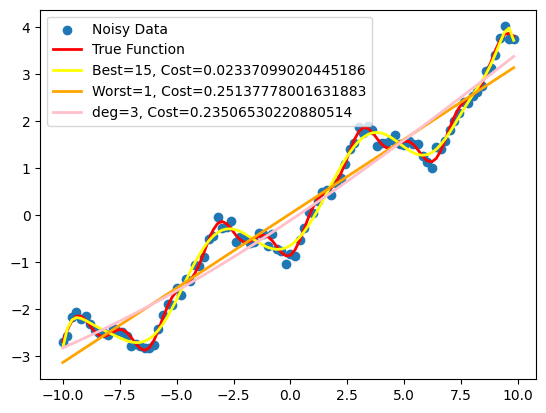

In [132]:
# Your code:
# Plot the original and noisy data
plt.scatter(x, Y_noisy, label='Noisy Data')
plt.plot(x, Y, label='True Function', color='red', linewidth=2)
plt.plot(x, models[-1].predict(x.reshape(-1, 1)), label=f'Best=15, Cost={costs[-1]}', color='yellow', linewidth=2)
plt.plot(x, models[0].predict(x.reshape(-1, 1)), label=f'Worst=1, Cost={costs[0]}', color='orange', linewidth=2)
plt.plot(x, models[2].predict(x.reshape(-1, 1)), label=f'deg=3, Cost={costs[2]}', color='pink', linewidth=2)
plt.legend()
plt.show()


- Describe the results of your observations by mentioning the values of bias and variance

if we choose MSE as loss function, bias and variance will be in this form:

$MSE = {bias}^2 + variance$

we can compute MSE and variance easily and with having these two, we can calculate bias:

In [133]:
# Your code:
def calculate_bias_variance(pred, y):
    var = np.var(pred)
    MSE = np.mean((y - np.mean(pred))** 2)
    bias = np.sqrt(MSE - var)
    return bias, var

If we look at the values of bias and variance for each model, Variance has an ascending trend while Bias has a descending trend. This is exactly what we expected from the results: Models with low degree should have high bias and low variance. On the other hand, high degree models should have low bias and high variance:

In [134]:
bias = []
vars = []

for idx, model in enumerate(models):
    # Make predictions and Compute bias and variance
    Y_pred = model.predict(x.reshape(-1, 1))
    b, var = calculate_bias_variance(Y_pred, Y_noisy)

    bias.append(b)
    vars.append(var)

    print("////////////////")
    print(f"** Degree {idx+1} **")
    print("Bias: ", b)
    print("Variance: ", var)

////////////////
** Degree 1 **
Bias:  0.5013758869514167
Variance:  3.3328662203883734
////////////////
** Degree 2 **
Bias:  0.48504851729284376
Variance:  3.3489719362767074
////////////////
** Degree 3 **
Bias:  0.4848353351486868
Variance:  3.3491786981959537
////////////////
** Degree 4 **
Bias:  0.43497478706299
Variance:  3.3950409350242
////////////////
** Degree 5 **
Bias:  0.4345333275916766
Variance:  3.3954247876167982
////////////////
** Degree 6 **
Bias:  0.4154135396769643
Variance:  3.4116755914577483
////////////////
** Degree 7 **
Bias:  0.4123509929410051
Variance:  3.4142106590252603
////////////////
** Degree 8 **
Bias:  0.2416444518102499
Variance:  3.525851959314017
////////////////
** Degree 9 **
Bias:  0.24033413706168688
Variance:  3.526483502967508
////////////////
** Degree 10 **
Bias:  0.1760178811998306
Variance:  3.5532617059026155
////////////////
** Degree 11 **
Bias:  0.17550048001513255
Variance:  3.5534435819191525
////////////////
** Degree 12 **
B

- Now, we only consider the degree of 15  in order to see the impact of regularization on overfitting. Plot the data, your estimated function (degree of 15), and the true function Y in a single plot.

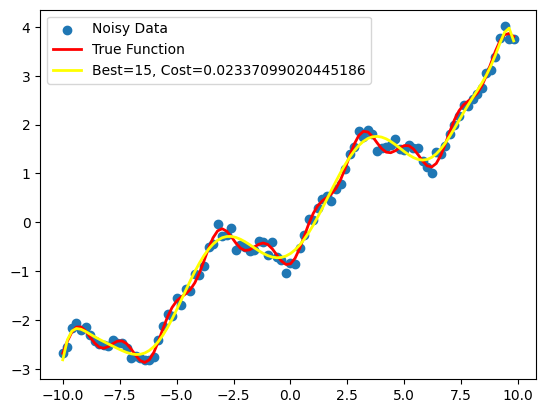

In [135]:
# Your code:
plt.scatter(x, Y_noisy, label='Noisy Data')
plt.plot(x, Y, label='True Function', color='red', linewidth=2)
plt.plot(x, models[-1].predict(x.reshape(-1, 1)), label=f'Best=15, Cost={costs[-1]}', color='yellow', linewidth=2)
plt.legend()
plt.show()

Answer these questions:
1. Explain why does overfitting happen?
2. Discuss about the training error and generalization error of this model.






<font color='#8FCF26' size='+2'>**A2:**</font>



1.   The function with degree 15 tried to capture all of the patterns in data even noisy patterns. This leads to overfitting and it is becuase the high degree of polynomial features that we have. To reduce the effect of it, we should use polynomial features with less degrees.
2.   Because the predicted function has fitted precisely on training data, our training error is very low here but about generalization error is not true. As our model tried to just capture the patterns of training data, its generalization error is high. Because it can't adapt with new data. Unfortunately we could not use this model with unseen data and it will operate poorly on it.



Now, you should do:
1. Add $l^2$ regularizer to your model ($λ=1$).
2. Plot data, your estimated function, and the true function in a single plot.

In [136]:
# Your code:
from sklearn.linear_model import Ridge
model_l2 = Pipeline([('polyfeat', PolynomialFeatures(degree=15)), ('lin_reg', Ridge(alpha=1))])
model_l2.fit(x.reshape(-1, 1), Y_noisy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.9026e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=15)),
                ('lin_reg', Ridge(alpha=1))])

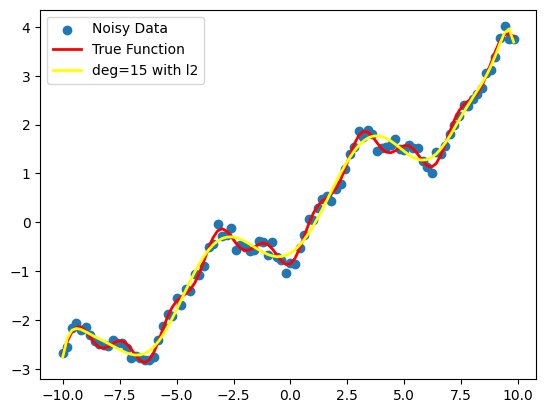

In [137]:
plt.scatter(x, Y_noisy, label='Noisy Data')
plt.plot(x, Y, label='True Function', color='red', linewidth=2)
plt.plot(x, model_l2.predict(x.reshape(-1, 1)), label='deg=15 with l2', color='yellow', linewidth=2)
plt.legend()
plt.show()

Move on to $l^1$, let's see its impact. You should do the following steps:
1. Add $l^1$ regularizer to your model ($λ=1$).
2. Plot data, your estimated function, and the true function in a single plot.

In [138]:
# Your code:
from sklearn.linear_model import Lasso
model_l1 = Pipeline([('polyfeat', PolynomialFeatures(degree=15)), ('lin_reg', Lasso(alpha=1))])
model_l1.fit(x.reshape(-1, 1), Y_noisy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+01, tolerance: 3.584e-02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=15)),
                ('lin_reg', Lasso(alpha=1))])

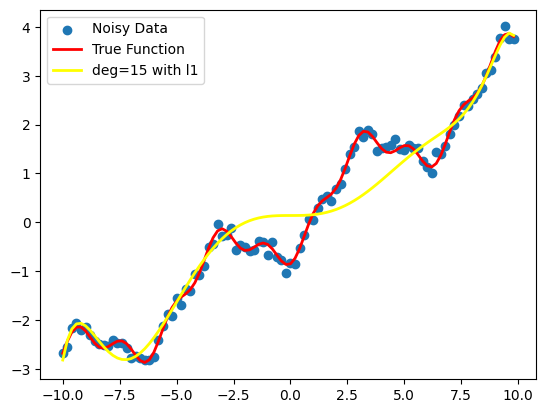

In [139]:
plt.scatter(x, Y_noisy, label='Noisy Data')
plt.plot(x, Y, label='True Function', color='red', linewidth=2)
plt.plot(x, model_l1.predict(x.reshape(-1, 1)), label='deg=15 with l1', color='yellow', linewidth=2)
plt.legend()
plt.show()

For each model, plot a histogram of the value of their parameters ($w_i$).

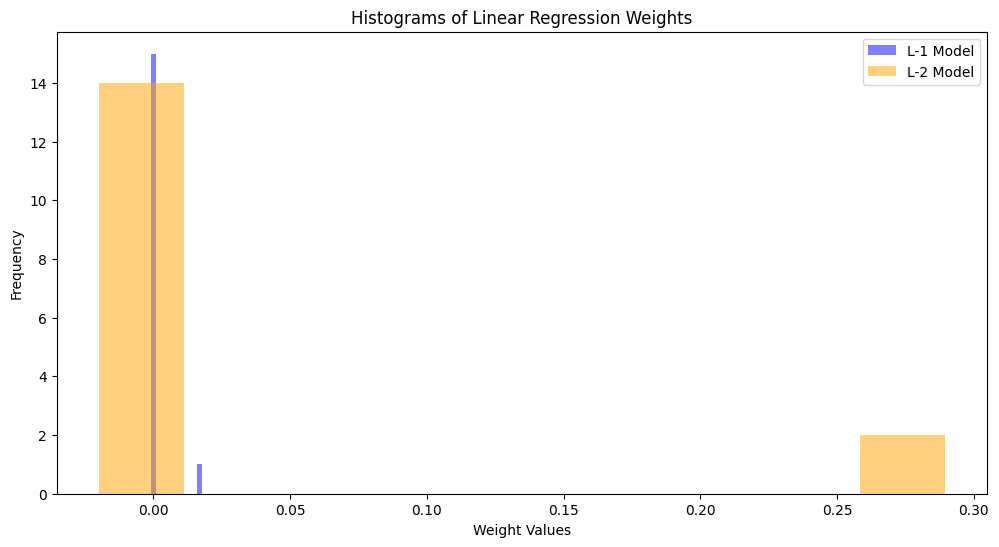

In [140]:
# Extract coefficients (weights)
weights_model1 = model_l1['lin_reg'].coef_
weights_model2 = model_l2['lin_reg'].coef_

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(weights_model1, bins=10, alpha=0.5, label='L-1 Model', color='blue')
plt.hist(weights_model2, bins=10, alpha=0.5, label='L-2 Model', color='orange')

plt.title('Histograms of Linear Regression Weights')
plt.xlabel('Weight Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

Answer these questions:

1. Compare the results of models.

2. Explain the impact of each regularizer?

2. Which one is the best estimate of the true function? Why?

3. Compare the histograms and discuss their differences.

4. Which regularizer do you think is more robust to outlier data? Justify your answer.

<font color='#8FCF26' size='+2'>**A2:**</font>


1.   Model with L2 again is fitted to training data in such a way that it captures all patterns even noisy data. In contrast, model with L2 has not completely fitted to traning data. In this scenario, the training error is higher, but the generalization error is lower.

2.   In the first model, that we applied L2 on it, there is no obvious change in result. It seems that L2 regularization could not reduce the effect of overfitting so much. But about L1, the conditions are different. According to the plot of it, we see obvious changes in the predicted function. Now, the effect of overfitting has reduced and it can generalize to unseen data better.

3. The first model (L2) is estimating the true function better. To understand this, we just should look at its plot. It has very small difference with true function while the second model (L2) in some points has high differences with true function.

4. The sparsity of weights in L1 model has indicated properly in the histogram. Most of the weights for L1 model are zero and the weights are sparse. For L2 model, we have wider and more distributed ranges for weights. In Addition, For L2 model, many weights are near the zero but not exaclty zero that indicated the feature of L2.

5.  The more able a model is to ignore extreme values in the data, the more robust it is to outliers.
The L1 is more robust than the L2, for these reasons: the L2 squares values, so it increases the cost of outliers exponentially; the L1 only takes the absolute value, so it considers them linearly.

There is another regularization technique called *elastic net regularization* which uses both $l^1$ and $l^2$ regularization terms. Elastic net linearly combines $l^1$ and $l^2$ penalty terms and tries to prevent the model from overfitting. Try to regularize the model using elastic net ($λ_1=λ_2=1$) and then plot data, your estimated function, and the true function in a single plot.

In [141]:
# Your code
from sklearn.linear_model import ElasticNet
model_enet = Pipeline([('polyfeat', PolynomialFeatures(degree=15)), ('lin_reg', ElasticNet())])
model_enet.fit(x.reshape(-1, 1), Y_noisy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+01, tolerance: 3.584e-02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=15)),
                ('lin_reg', ElasticNet())])

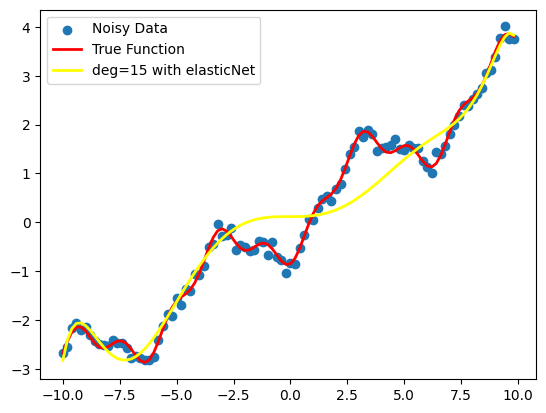

In [142]:
plt.scatter(x, Y_noisy, label='Noisy Data')
plt.plot(x, Y, label='True Function', color='red', linewidth=2)
plt.plot(x, model_enet.predict(x.reshape(-1, 1)), label='deg=15 with elasticNet', color='yellow', linewidth=2)
plt.legend()
plt.show()

## <font color='#D61E85' size='+3'>**Q3:**</font> <font size='+2'> **Bias-Variance Trade-off** </font>

Prove the below equation, which is called bias-variance decomposition:

$$\mathbb{E}[(y−f_s(x))^2] = (y − \mathbb{E}[f_s(x)] )^2 + \mathbb{E} [(\mathbb{E}[f_s(x)]−f_s(x))^2]$$

Using the above equation, interpret the following figure.

![](https://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

- In which area of the figure underfitting and overfitting will happen? why?

- Talk about the training error and generalization error w.r.t above figure and explain its relationship with bias and variance.

<font color='#8FCF26' size='+2'>**A3:**</font>

**proof:**
$\text{MSE} = \mathbb{E}[(y - f_s(x) + \mathbb{E}[f_s(x)] - \mathbb{E}[f_s(x)])^2]  = \mathbb{E}[(y - \mathbb{E}[f_s(x)])^2 + 2(y - \mathbb{E}[f_s(x)])(\mathbb{E}[{f_s(x)}] - f_s(x)) + (\mathbb{E}[f_s(x)] - f_s(x))^2] = \mathbb{E}[(y - \mathbb{E}[f_s(x)])^2] + 2\mathbb{E}[(y - \mathbb{E}[{f_s(x)}])(\mathbb{E}[f_s(x)] - f_s(x)] + \mathbb{E}[(\mathbb{E}[f_s(x)] - f_s(x))^2]
$

we know that $y - \mathbb{E}[{f_s(x)}]$ is constant so will have:

$(y - \mathbb{E}[f_s(x)])^2 + 2(y - \mathbb{E}[{f_s(x)}])\mathbb{E}[(\mathbb{E}[f_s(x)] - f_s(x)] + \mathbb{E}[(\mathbb{E}[f_s(x)] - f_s(x))^2]$

And we also know that $\mathbb{E}[f_s(x)]$ is a constant:

$(y - \mathbb{E}[f_s(x)])^2 + 2(y - \mathbb{E}[{f_s(x)}])(\mathbb{E}[f_s(x)] - \mathbb{E}[f_s(x)]) + \mathbb{E}[(\mathbb{E}[f_s(x)] - f_s(x))^2]$

The expression $(\mathbb{E}[f_s(x)] - \mathbb{E}[f_s(x)])$ is zero. We proved this formula:

$$\mathbb{E}[(y−f_s(x))^2] = (y − \mathbb{E}[f_s(x)] )^2 + \mathbb{E} [(\mathbb{E}[f_s(x)]−f_s(x))^2]$$



*   When the model complexity is low, we have high bias and low variance. This the point that we have underfitting. Because the model is not enough complex to predict data accurately. On the other hand, when the model complexity is high, we have low bias and high variance, it means that we have overfitting. Because our model is too complex to capture all of patterns even noisy data.
*   Training error is low when our model has precisely fitted to train data. For this scenario, we should have a complex model where the variance is high and bias is low. In contrast, generalization error is low, when our model has an accepatble ability to predict unseen data. If a models has high complexity, it can't generalize well so if we want lower generalization error, we should consider simpler models, when bias is high and variance is low. In other words, we have a trade-off between training error and generalization error and they have a relation with model complexity.



## <font color='#D61E85' size='+3'>**Q4:**</font> <font size='+2'> **Circle** </font>

In this problem, we will use logistic regression to separate points inside a circle from the outside ones. The code below uses the random functions of the NumPy library to uniformly generate data inside a square A*A centered at (x1_0, x2_0). Points that lie inside the circle (x1_0,x2_0,R) get labeled 1 and vice versa.

In [143]:
import numpy as np
import matplotlib.pyplot as plt

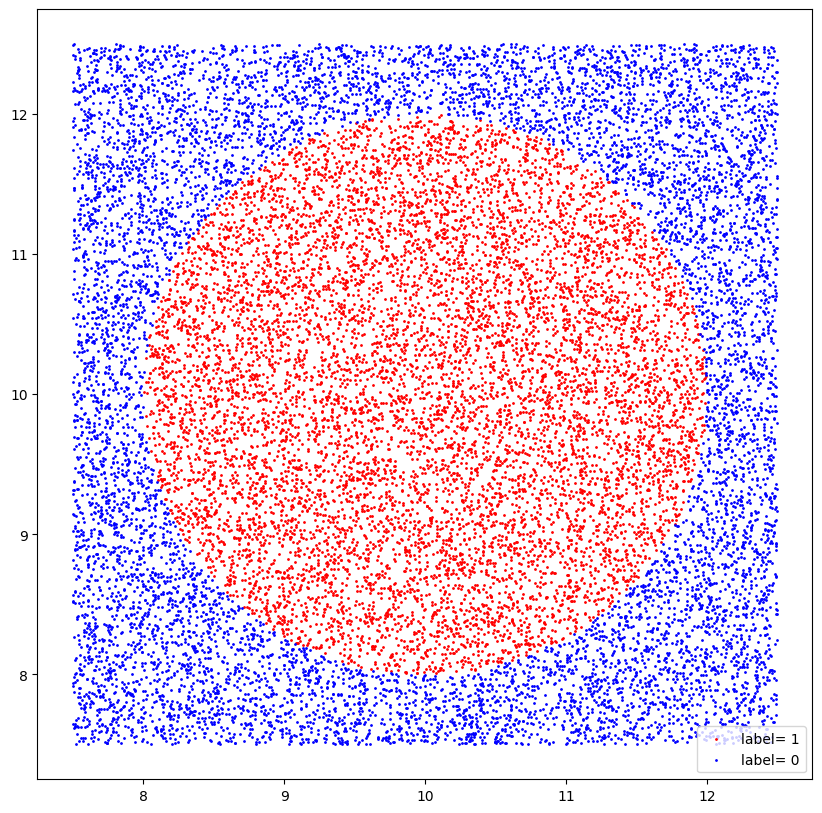

In [144]:
x1_0 = 10
x2_0 = 10
A = 5
N = 20000
R = 2

x1 = A *np.random.rand(N) + x1_0 - A/2
x2 = A *np.random.rand(N) + x2_0 - A/2
rr = np.square(x1-x1_0) + np.square(x2-x2_0)
label = rr<= R**2

plt.figure(figsize = (10,10))
plt.scatter(x1[label==1], x2[label==1],c='r', s= 1, label="label= 1")
plt.scatter(x1[label==0], x2[label==0],c='b' ,s =1, label="label= 0")
plt.legend()

Using the logistic regression model in Scikit-learn library we want to classify these points.

### Step 1
In this step, use x1 and x2 as input features.

You should do:

1. Split the data into the test set and train set (with ratio = 0.5).

2. Create a logistic regression model (without penalty).

2. Feed the training points into your model and train it.

3. Using your trained model, predict labels of the test set.

4. Plot the data such that their color represents their predicted label (like the previous image).

At first we split our data to train and test sets:

In [145]:
# Step 1
from sklearn.model_selection import train_test_split
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)
X = np.concatenate((x1, x2),axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, label, test_size=0.5, random_state=42)

Now we initialize logistic regression model and fit it on train data:

In [146]:
# Step 2 - 3
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None, random_state=42)
model.fit(X_train, Y_train)

LogisticRegression(penalty=None, random_state=42)

Now it's time to predict test data and plot them:

In [147]:
# Step 4
pred_test = model.predict(X_test)

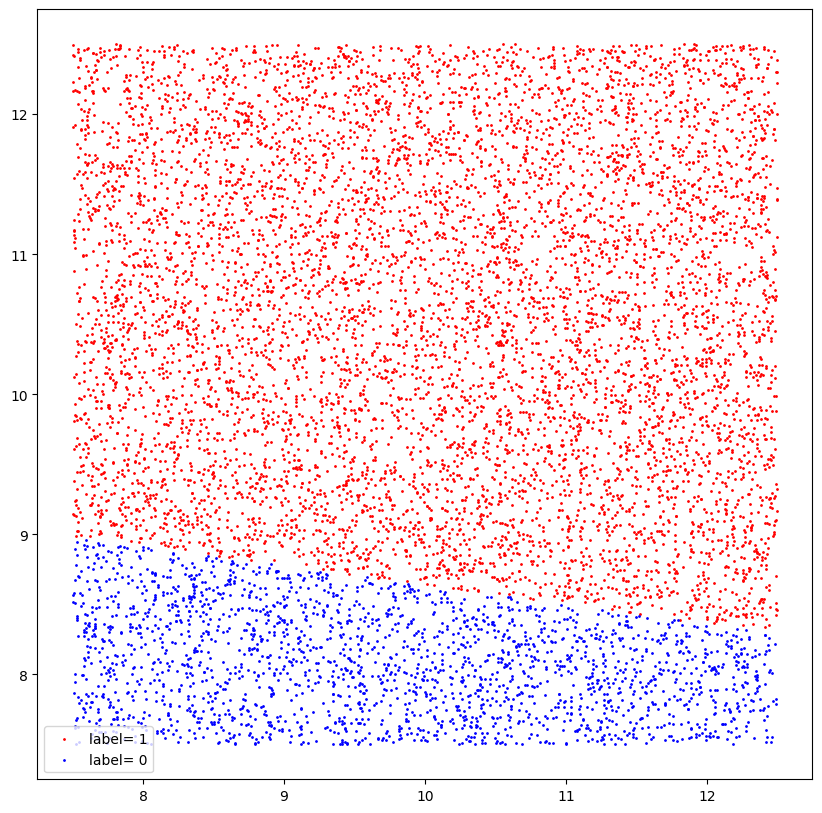

In [148]:
# Step 5
plt.figure(figsize = (10,10))
plt.scatter(X_test[:,0][pred_test==1], X_test[:,1][pred_test==1],c='r', s= 1, label="label= 1")
plt.scatter(X_test[:,0][pred_test==0], X_test[:,1][pred_test==0],c='b' ,s =1, label="label= 0")
plt.legend()


Answer these questions:

1. Explain what logistic regression is.

2. Write its formula for this problem (be specific about the dimension of the variables).

3. Learning is all about finding unknown parameters of the model to make it fit the training data. Point out the unknown parameters of your logistic regression model.


**Answer:**


1.   Logistic Regression is a statistical method used for binary classification, which is the task of predicting one of two possible outcomes. Despite its name, logistic regression is a classification algorithm rather than a regression algorithm. It is widely used in machine learning and statistics for various applications due to its simplicity and interpretability. It is used especially when the relationship between features and the target variable is assumed to be linear.
2.   In logistic regression with two features $x_1$ and $x_2$, and a binary label $y$, the model predicts the probability that
$y$ belongs to the positive class (e.g. y=1). The logistic regression formula is given by:
$
         \begin{equation}
        \text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2
\end{equation}
$

    The logistic function (sigmoid) is applied to both sides of the equation to convert the log-odds into a probability: $p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$

3. In the logistic regression model, the unknown parameters that need to be learned from the training data are the coefficients (weights) associated with each feature and the intercept term. For the logistic regression model with two features $x_1$ and $x_2$, the unknown parameters are:
    - intercept ($\beta_0$)
    - weights or coefficients ($\beta_1$, $\beta_2$)


As you can probably see, your model is a big mess.
Can you guess why?


**Answer:** Logistic Regression can properly classify data points that are linearly separable bu in here we don't have just a straight line to distinguisgh classes. So it fails in this scenario.

Answer these questions:

1. With respect to your model, specify TP, TN, FP, and FN points. (plot them in 4 different colors)

2. Report the following metrics for your model: accuracy, precision (sensitivity), recall, and specificity.

In [149]:
TN_indices = np.where((Y_test == 0) & (pred_test == 0))[0]
FP_indices = np.where((Y_test == 0) & (pred_test == 1))[0]
FN_indices = np.where((Y_test == 1) & (pred_test == 0))[0]
TP_indices = np.where((Y_test == 1) & (pred_test == 1))[0]

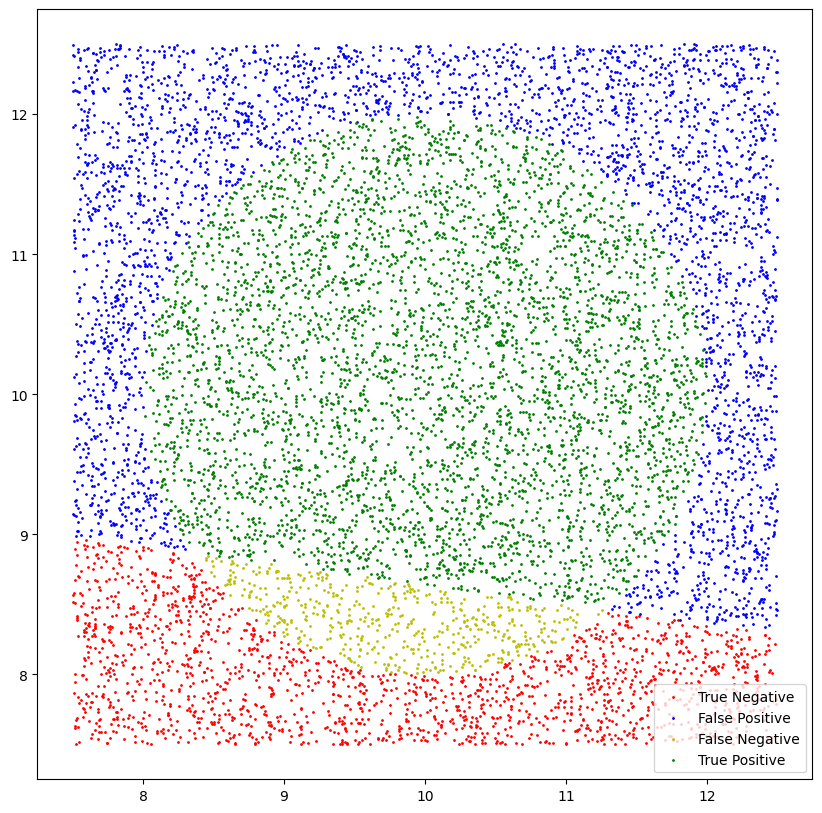

In [150]:
#plot TP, TN, FP, FN
plt.figure(figsize = (10,10))
plt.scatter(X_test[TN_indices][:,0], X_test[TN_indices][:,1],c='r', s= 1, label="True Negative")
plt.scatter(X_test[FP_indices][:,0], X_test[FP_indices][:,1],c='b' ,s =1, label="False Positive")
plt.scatter(X_test[FN_indices][:,0], X_test[FN_indices][:,1],c='y' ,s =1, label="False Negative")
plt.scatter(X_test[TP_indices][:,0], X_test[TP_indices][:,1],c='g' ,s =1, label="True Positive")
plt.legend()

In [151]:
## calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, pred_test).ravel()
specificity = tn / (tn+fp)
acc = accuracy_score(Y_test, pred_test)
prec = precision_score(Y_test, pred_test)
recall = recall_score(Y_test, pred_test)
print("*** Metrics: ***")
print("- Accuracy: ", acc)
print("- Precision: ", prec)
print("- Recall: ", recall)
print("- Specificity: ", specificity)

*** Metrics: ***
- Accuracy:  0.6207
- Precision:  0.5786350148367952
- Recall:  0.894852354349561
- Specificity:  0.34522854851643947


###Step 2

Now it is time to do some serious work!

To train a model that actually works, we need to use something called [Kernel](https://en.wikipedia.org/wiki/Kernel_method).
To put it simply, Kernel is a transformation that transforms input space into a feature space. By mapping the inputs to the feature space, we would have some features that are more usable for our model. In other words, sometimes our model is not that complex to extract those features by itself (e.g., linear regression), so Kernel does it for the model.

You should do:

1. Find a proper kernel for our problem (be careful! the circle was not centered at (0,0)).
2. Convert the inputs using the Kernel.
3. Feed the resulting features into the model and train it.
4. Evaluate your model on the test set (plot points with the predicted labels).
5. What is the accuracy of your model now? (Congratulation!!)


For the kernel I decided to use RBF with the following formula. It is parameterized by a length scale parameter $l$:

$k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)$

In [152]:
## kernel
from sklearn.kernel_approximation import RBFSampler
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_train_rbf = rbf_feature.fit_transform(X_train)
X_test_rbf = rbf_feature.fit_transform(X_test)

In [153]:
## train and predict
model = LogisticRegression()
model.fit(X_train_rbf, Y_train)
Y_pred = model.predict(X_test_rbf)

RBF did a great work! According to the following, it classified almost all of the data points correctly!

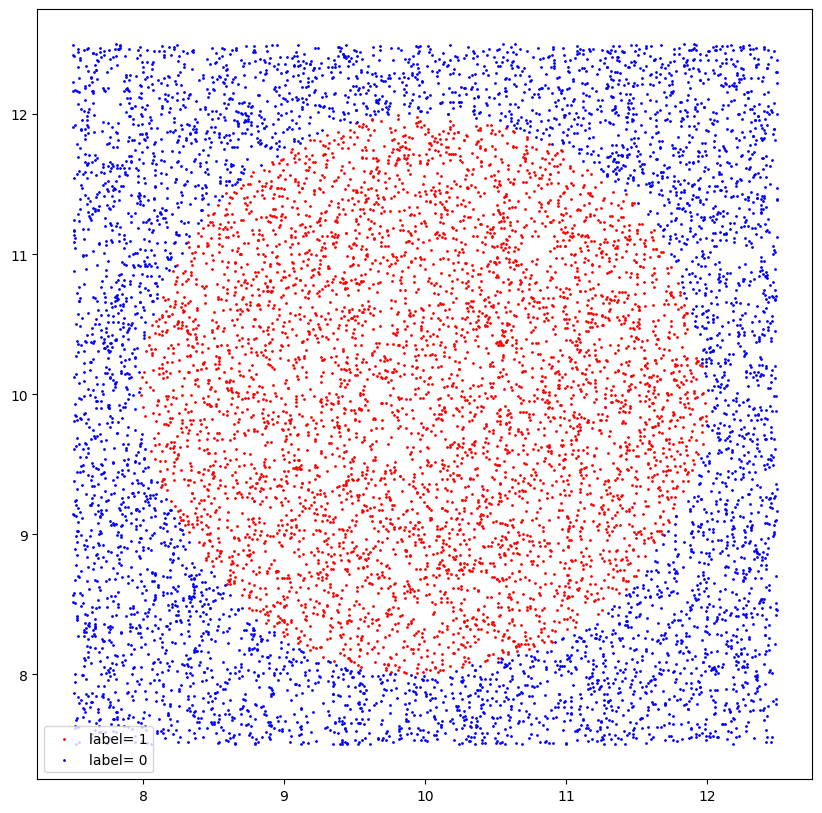

In [154]:
## plot# Step 5
plt.figure(figsize = (10,10))
plt.scatter(X_test[:,0][Y_pred==1], X_test[:,1][Y_pred==1],c='r', s= 1, label="label= 1")
plt.scatter(X_test[:,0][Y_pred==0], X_test[:,1][Y_pred==0],c='b' ,s =1, label="label= 0")
plt.legend()

The high accuracy shows everything! we solved this problem:

In [155]:
## calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy on Test Set: ", acc)

Accuracy on Test Set:  0.9926


## <font color='#D61E85' size='+3'>**Q5:**</font> <font size='+2'> **Logistic Regression** </font>

In this question you need to implement logistic regression from scratch. Then you will use it and try to reproduce the results of previous question.

Let's explain the code step by step:


*   in the fit function, we the training process. At first we initialize weights with normal distribution. In the next steps, we will update weights.
*   We will continue training loop num_iter times. In every loop. at first we should compute the logit of inputs that in fact we multiply inputs in weights.
* After that, we pass to logit to activation function to compute the model output. The activation function is sigmoid.
* Now it's time to calculate error and with that, we will calculate gradient.
* Having the gradient and learning rate, now we can update the weights.
* Finally, we can compute the loss using log-loss.



In [173]:
from sklearn.base import BaseEstimator, ClassifierMixin

class LogisticRegression_1(BaseEstimator, ClassifierMixin):

    def __init__(self, lr=0.01, num_iter=1000, random_state=42):
        """
        lr: learning rate
        num_iter: number of iterations over the training data
        random_state: random state to initialize random weights, don't change the 42
        """
        self.lr = lr
        self.num_iter = num_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Parameters
        -------
        X : Training data, shape = [n_examples, n_features]
        y : Target values, shape = [n_examples]

        return
        -------
        self : Instance of LogisticRegression
        """

        # initialize weights using normal distribution (mean=0, std=0.01)
        # use weights[0] as bias and weights[1:] as non-bias weights
        rng = np.random.RandomState(self.random_state)
        self.weights = rng.normal(0, 0.01, X.shape[1] + 1)

        self.losses = []

        for i in range(self.num_iter):
            f_x = self.logit(X)
            output = self.activation(f_x)

            # calculate the error and update the model parameters using gradient descent
            error = y - output
            gradient = np.dot(X.T, error)
            self.weights[1:] += self.lr * (1/X.shape[0]) * gradient  # update non-bias weights

            # update bias weight (weights[0])
            self.weights[0] += self.lr * (1/X.shape[0]) * error.sum()

            # calculate the cost
            loss = self.calculate_loss(y, output)
            self.losses.append(loss)

        return self

    def activation(self, z):
        # Compute logistic sigmoid activation
        return 1 / (1 + np.exp(-z))

    def logit(self, X):
        # Compute the logit (linear combination of weights and features)
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        # Return class label
        return np.round(self.activation(self.logit(X)))

    def calculate_loss(self, y, output):
        # Calculate the logistic loss
        return -(1/X.shape[0]) * (y * np.log(output) + (1 - y) * np.log(1 - output))


Now, use your implementation to reproduce the results of previous question. Also, try to plot the learning curve of your training process.

In [177]:
imp_model = LogisticRegression_1(lr=0.01, num_iter=400)
imp_model.fit(X_train, Y_train.astype(int))

LogisticRegression_1(num_iter=400)

In [178]:
pred_test = imp_model.predict(X_test)

Like the first logistic regression model, we don't have a good performance here too:

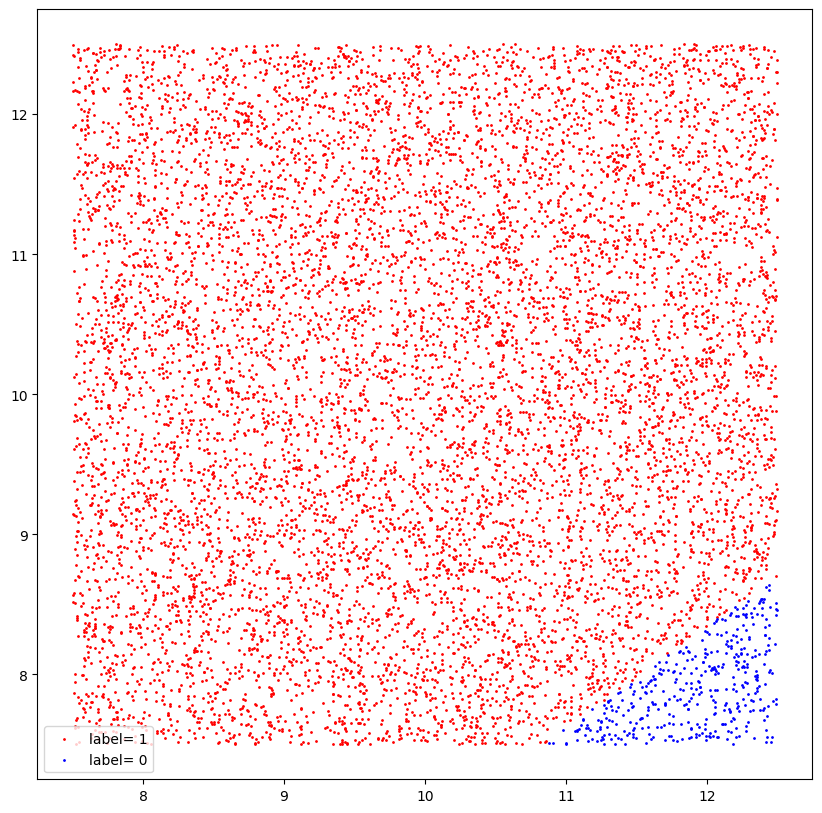

In [179]:
# Step 5
plt.figure(figsize = (10,10))
plt.scatter(X_test[:,0][pred_test==1], X_test[:,1][pred_test==1],c='r', s= 1, label="label= 1")
plt.scatter(X_test[:,0][pred_test==0], X_test[:,1][pred_test==0],c='b' ,s =1, label="label= 0")
plt.legend()

Learning Curve shows that if we increase samples in the training set step by step, how it will affect on model score. In the plot, we see that at first increasing samples, decreased the model score. But approximately after 2500 samples, we see an ascending trend until 6000 samples, when after that increasing has not changed the model score:

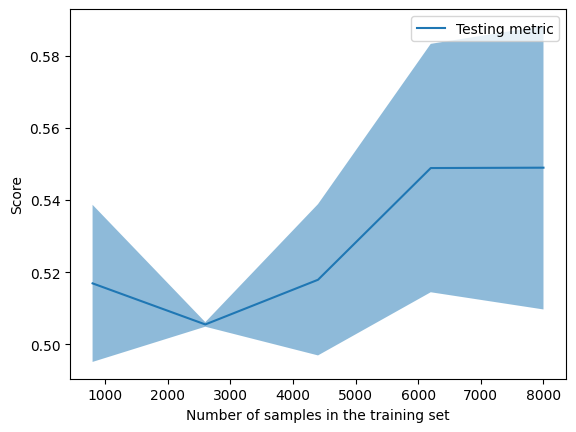

In [180]:
from sklearn.model_selection import LearningCurveDisplay
LearningCurveDisplay.from_estimator(imp_model, X_train, Y_train)